In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_id = pd.read_csv('data/mouse_drug_data.csv')
clinical_id = pd.read_csv('data/clinicaltrial_data.csv')

# Combine the data into a single dataset
merge_table_df = pd.merge(mouse_id, clinical_id, on="Mouse ID", how="outer")
merge_table_df


# Display the data table for preview
merge_table_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
merge_table_df.groupby(['Drug', 'Timepoint']).mean()


# Convert to DataFrame
Mean_tumor_df=merge_table_df.groupby(['Drug', 'Timepoint']).mean()
# Preview DataFrame
Mean_tumor_df.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# merge_table_df.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
Tumor_error_df=merge_table_df.groupby(["Drug", "Timepoint"]).sem()

# Preview DataFrame
Tumor_error_df=pd.DataFrame(Tumor_error_df).reset_index().drop(["Metastatic Sites", "Mouse ID"], axis=1)
Tumor_error_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [24]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean = Mean_tumor_df.pivot_table(index='Timepoint', columns='Drug')['Metastatic Sites']

tumor_vol_mean=Mean_tumor_df.pivot_table(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
pivot_mean.head()

tumor_vol_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


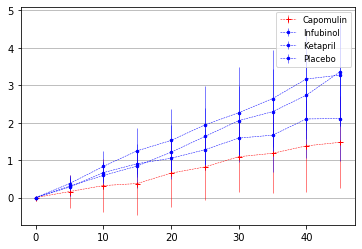

In [7]:
pivot_error = Tumor_error_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

pivot_error.head()

# Generate the Plot (with Error Bars)
# Generate the Plot (with Error Bars)
plt.errorbar(pivot_mean.index, pivot_mean["Capomulin"], yerr=pivot_error["Capomulin"], color="r", marker="+", markersize=5, linestyle="dashed", linewidth=0.50)

plt.errorbar(pivot_mean.index, pivot_mean["Infubinol"], yerr=pivot_error["Infubinol"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_mean.index, pivot_mean["Ketapril"], yerr=pivot_error["Ketapril"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivot_mean.index, pivot_mean["Placebo"], yerr=pivot_error["Placebo"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
# Save the Figure

plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)



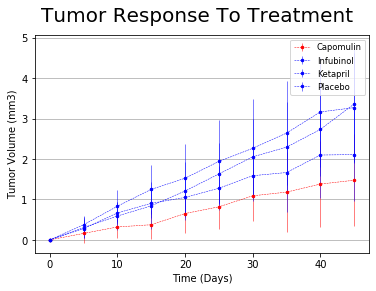

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel('Time (Days)')


ax.set_ylabel('Tumor Volume (mm3)')

fig.suptitle('Tumor Response To Treatment', fontsize=20)

ax.errorbar(pivot_mean.index, pivot_mean["Capomulin"], 
            yerr=pivot_error["Infubinol"], color="r", marker=".", 
            markersize=5, linestyle="dashed", 
            linewidth=0.50)
ax.errorbar(pivot_mean.index, pivot_mean["Infubinol"], yerr=pivot_error["Infubinol"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
ax.errorbar(pivot_mean.index, pivot_mean["Ketapril"], yerr=pivot_error["Ketapril"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
ax.errorbar(pivot_mean.index, pivot_mean["Placebo"], yerr=pivot_error["Placebo"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)

ax.grid(axis='y')
ax.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

In [9]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [10]:
 
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
merge_table_df.groupby(["Drug", "Timepoint"]).mean()

mean_met_sites = merge_table_df.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites": "mean"}).reset_index()
mean_met_sites.head()
# Convert to DataFrame
# mean_met_df = pd.DataFrame(mean_met_sites).reset_index().drop("Tumor Volume (mm3)",axis=1)

# mean_met_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_merge=merge_table_df.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites": "sem"})
# Convert to DataFrame
sem_merge.head()
# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
# Minor Data Munging to Re-Format the Data Frames
sem_merge = merge_table_df.pivot_table(index='Timepoint', columns='Drug')['Metastatic Sites']



# Preview that Reformatting worked
sem_merge.head()


# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


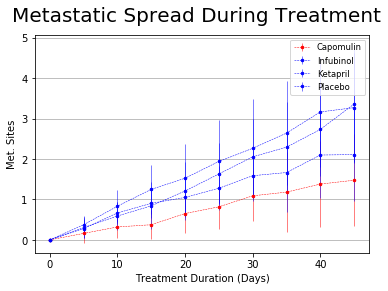

In [13]:
# Generate the Plot (with Error Bars)
fig, ax_1 = plt.subplots()
ax_1.set_xlabel('Treatment Duration (Days)')


ax_1.set_ylabel('Met. Sites')

fig.suptitle('Metastatic Spread During Treatment', fontsize=20)

ax_1.errorbar(sem_merge.index, sem_merge["Capomulin"], 
            yerr=pivot_error["Infubinol"], color="r", marker=".", 
            markersize=5, linestyle="dashed", 
            linewidth=0.50)
ax_1.errorbar(sem_merge.index, sem_merge["Infubinol"], yerr=pivot_error["Infubinol"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
ax_1.errorbar(sem_merge.index, sem_merge["Ketapril"], yerr=pivot_error["Ketapril"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)
ax_1.errorbar(sem_merge.index, sem_merge["Placebo"], yerr=pivot_error["Placebo"], color="b", marker=".", markersize=5, linestyle="dashed", linewidth=0.50)

ax_1.grid(axis='y')
ax_1.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice=merge_table_df.groupby(["Drug", "Timepoint"]).size()

count_mice_df=pd.DataFrame(count_mice).reset_index()

print(count_mice_df)

# Convert to DataFrame

# Preview DataFrame


         Drug  Timepoint   0
0   Capomulin          0  25
1   Capomulin          5  25
2   Capomulin         10  25
3   Capomulin         15  24
4   Capomulin         20  23
5   Capomulin         25  22
6   Capomulin         30  22
7   Capomulin         35  22
8   Capomulin         40  21
9   Capomulin         45  21
10   Ceftamin          0  25
11   Ceftamin          5  21
12   Ceftamin         10  20
13   Ceftamin         15  19
14   Ceftamin         20  18
15   Ceftamin         25  18
16   Ceftamin         30  16
17   Ceftamin         35  14
18   Ceftamin         40  14
19   Ceftamin         45  13
20  Infubinol          0  25
21  Infubinol          5  25
22  Infubinol         10  21
23  Infubinol         15  21
24  Infubinol         20  20
25  Infubinol         25  18
26  Infubinol         30  17
27  Infubinol         35  12
28  Infubinol         40  10
29  Infubinol         45   9
..        ...        ...  ..
70   Ramicane          0  25
71   Ramicane          5  25
72   Ramicane 

In [15]:
# Minor Data Munging to Re-Format the Data Frames
count_pivot = count_mice_df.pivot_table(index='Timepoint', columns='Drug')



# Preview that Reformatting worked
count_pivot.head()

# Preview the Data Frame


0                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [16]:
# Generate the Plot (Accounting for percentages)


# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [27]:
# Calculate the percent changes for each drug
drug_columns = ["Capomulin",
               "Ceftamin",
               "Infubinol",
               "Ketapril",
               "Naftisol",
               "Placebo",
               "Propriva",
               "Ramicane",
               "Stelasyn",
               "Zoniferol"]
pct_change=(tumor_vol_mean[drug_columns].iloc[-1]/tumor_vol_mean[drug_columns].iloc[0]-1)

print(pct_change)

# Calculate the percent changes for each drug

# pct_change = 100*(pivot_mean[drug_columns].iloc[-1]/pivot_mean[drug_columns].iloc[0]-1)
# # Display the data to confirm
# print(pct_change)

# Display the data to confirm


Drug
Capomulin   -0.194753
Ceftamin     0.425165
Infubinol    0.461235
Ketapril     0.570288
Naftisol     0.539233
Placebo      0.512980
Propriva     0.472412
Ramicane    -0.223209
Stelasyn     0.520851
Zoniferol    0.465798
dtype: float64


[-0.19475302667894168, 0.4612347172785187, 0.5702879468660607, 0.5129796048315152]


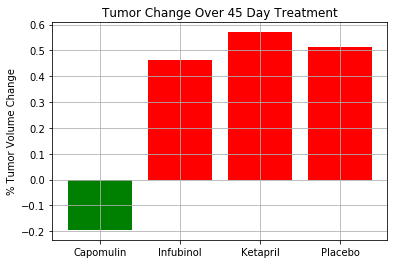

In [57]:
rel_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

new_list = [pct_change[drug_name] for drug_name in rel_drugs]
print(new_list)

fig, ax_2 = plt.subplots()
ax_2.bar(rel_drugs, new_list, color='r')
ax_2.bar(rel_drugs[0], new_list[0],color='gr')

ax_2.set_ylabel('% Tumor Volume Change')
ax_2.set_title('Tumor Change Over 45 Day Treatment')
ax_2.grid(axis="both")


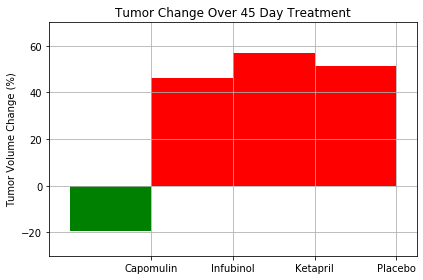

In [57]:
#rel_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
#rel_pct_change = [-19.475303,  46.123472, 57.028795, 51.297960]
#x_axis = np.arange(len(rel_pct_change))

# Splice the data between passing and failing drugs
#fig, ax_1 = plt.subplots()
#ax_1.set_xlabel('Treatment Duration (Days)')


#ax_1.set_ylabel('Met. Sites')

#fig.suptitle('Metastatic Spread During Treatment', fontsize=20)


# Orient widths. Add labels, tick marks, etc. 
#plt.bar(x_axis, rel_pct_change, width=1, color=("g","r","r","r"), align="edge", label="rel_pct_change")

##tick_locations = [value for value in x_axis + 1]
#plt.xticks(tick_locations, rel_drugs)

#plt.title("Tumor Change Over 45 Day Treatment")
#plt.ylabel("Tumor Volume Change (%)")

#plt.xlim(-.25, 4.25)
#plt.ylim(-30, 70)

#plt.grid(axis="both")

#plt.tight_layout()

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)